#### 
https://github.com/gerolaleticia/Pyrentena-a-dataset-per-week/blob/master/Semana%203%20%20-%20Dataset%20CO2/Pyrentena%20semana%203%20-%20CO2.ipynb

Machine Learning model for CO2 emisssion

In [130]:
#!pip3 install mysql-connector     

import mysql.connector as sql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

db_connection = sql.connect(host='10.0.0.21', database='co2_dev', user='co2user', password='c1m4V.21')
db_cursor = db_connection.cursor()
#db_cursor.execute('select id, ppm1, ppm2, date  from datos where ppm2 <= 10 and ppm1 < 300') #ppm1 > 340 and ppm1 < 395') #order by id desc limit 100000;
db_cursor.execute("select date as date_time, ppm1 as ppm, ppm2 as sensor  from datos where ppm2 <= 10 and ppm1 > 10 and ppm1 < 1600") # and date >= (CURDATE() - INTERVAL 1 MONTH)")
table_rows = db_cursor.fetchall()

df = pd.DataFrame(table_rows, columns=['date_time', 'ppm', 'sensor'])
# df.set_index('date_time', inplace=True)
df

,date_time,ppm,sensor
0,2021-10-13 13:12:18,293,2
1,2021-10-13 13:12:28,298,2
2,2021-10-13 13:12:39,300,2
3,2021-10-13 13:12:49,299,2
4,2021-10-13 13:12:59,298,2
...,...,...,...
2917303,2022-04-22 13:18:14,337,8
2917304,2022-04-22 13:18:18,374,9
2917305,2022-04-22 13:18:19,441,5
2917306,2022-04-22 13:18:22,430,10


In [131]:
df.describe().applymap('{:,.2f}'.format) #.apply("{0:.5f}".format)

,ppm,sensor
count,"2,917,308.00","2,917,308.00"
mean,385.68,6.30
std,115.17,2.61
min,12.00,2.00
25%,350.00,3.00
50%,368.00,7.00
75%,392.00,9.00
max,"1,599.00",10.00


In [132]:
a = df.loc[df.sensor == 10, :].shape[0]-.9
b = df.loc[df.sensor == 10, :].iloc[-1:]['date_time']

df['date_time'].dt.month 
#df.date_time.strptime(3, '%B').month
df[(df['date_time'].dt.isocalendar().week == 13) ]
#& (df['date_time'].dt.weekday_name == 'Monday'
#df['datetime_column_x']=np.where(df.datetime_column.dt.hour.between(0,9),s.shift(),df['datetime_column']


,date_time,ppm,sensor
2599021,2022-03-28 00:00:20,359,9
2599022,2022-03-28 00:00:20,358,5
2599023,2022-03-28 00:00:27,291,8
2599024,2022-03-28 00:00:27,355,7
2599025,2022-03-28 00:00:29,378,10
...,...,...,...
2694285,2022-04-03 23:59:15,355,5
2694286,2022-04-03 23:59:34,375,10
2694287,2022-04-03 23:59:35,350,9
2694288,2022-04-03 23:59:38,291,8


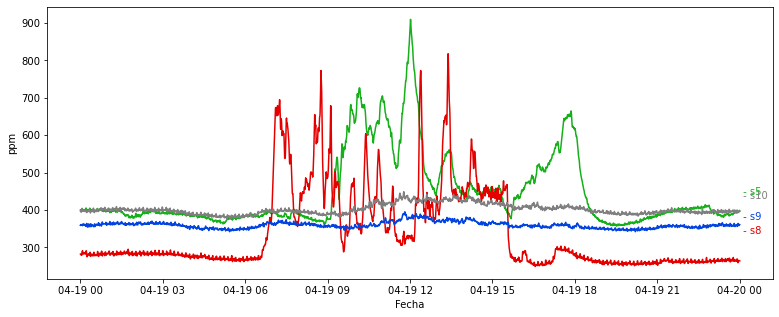

In [137]:
mycolors = ['xkcd:green', 'xkcd:red', 'xkcd:blue', 'tab:gray']
plt.figure(figsize=(13,5))
w = 14 # (df['date_time'].dt.isocalendar().week == w) 
m = 4
d = 19
# df.loc[(df['date'].dt.day==25) & (cust_df['date'].dt.month==12), 'xmas'] = 1
for i, x in enumerate([5, 8, 9, 10]):
    _ = df.loc[(df.sensor == x) & (df['date_time'].dt.day == d) & (df['date_time'].dt.month == m) , :]
    plt.plot(_.date_time, _.ppm, color=mycolors[i]) 
    plt.text(_.iloc[-1:]['date_time'], df.loc[df.sensor == x, :].iloc[-1:]['ppm'], " - s" + str(x), color=mycolors[i])
plt.gca().set(xlabel='Fecha', ylabel='ppm')
plt.show()

In [ ]:
df['month'] = [d.strftime('%b') for d in df.date_time]
months = df['month'].unique()

#import matplotlib as mpl
#np.random.seed(100)
#mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(months), replace=False)
mycolors = ['xkcd:aqua green', 'xkcd:lipstick red']


In [128]:
df.loc[df.month==month, :]


NameError: name 'month' is not defined

0
1


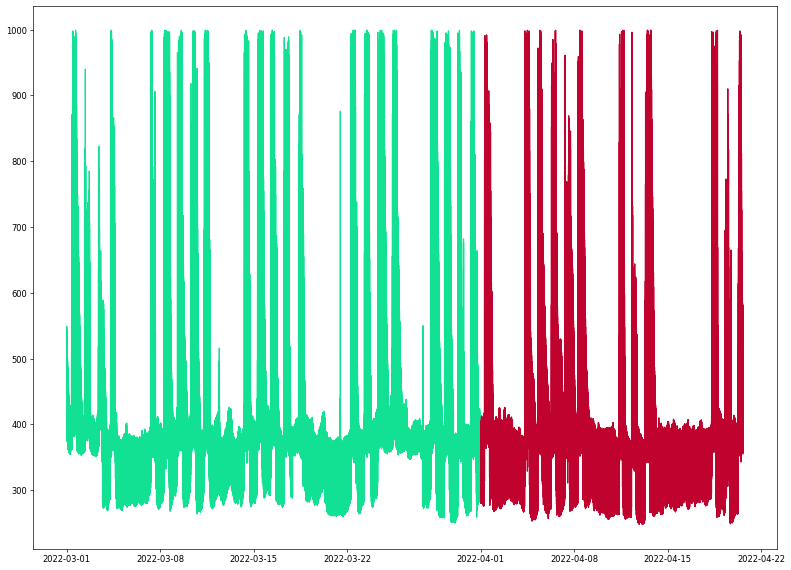

In [236]:
plt.figure(figsize=(16,12), dpi= 60)
for i, month in enumerate(months):
    if i > -1:        
        print(i)
        plt.plot('date_time', 'ppm', data=df.loc[df.month==month, :], color=mycolors[i], label=month)
        #plt.text(df.loc[df.month==month, :].shape[0]-.9, df.loc[df.month==month, 'ppm'][-1:].values[0], month, fontsize=12, color=mycolors[i])
        
#plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
#plt.yticks(fontsize=12, alpha=.7)
#plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
#plt.show()        

In [231]:
df.loc[df.month==month, :].shape

(236106, 4)

In [211]:
mycolors

array(['xkcd:aqua green', 'xkcd:lipstick red'], dtype='<U31')

In [208]:
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

NameError: name 'years' is not defined

<Figure size 1280x960 with 0 Axes>

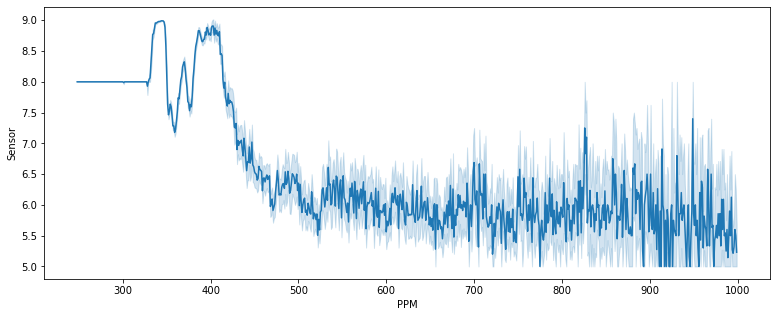

CPU times: user 19 s, sys: 312 ms, total: 19.3 s
Wall time: 21.6 s


In [157]:
%%time
plt.figure(figsize=(13,5)) 
sns.lineplot(x=df['ppm'], y=df['sensor']) 
plt.xlabel('PPM') 
plt.ylabel('Sensor') 
plt.show()

In [158]:
r = pd.DataFrame([df['sensor'] == 10])

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
r.shape

In [ ]:
plt.boxplot(df[['ppm']])
plt.show()

In [128]:
plt.figure(figsize=(13,5))
corr = df[['sensor','ppm']].corr()
corr

,sensor,ppm
sensor,1.000000,-0.098399
ppm,-0.098399,1.000000


<Figure size 936x360 with 0 Axes>

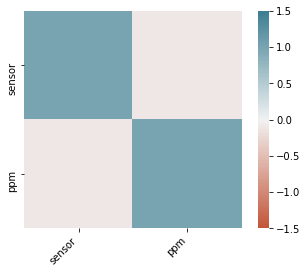

In [129]:
ax = sns.heatmap(corr, vmin=-1.5, vmax=1.5, center=0, cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [130]:
# features into variables
sensores = df[['sensor']]
ppms = df[['ppm']]

In [131]:
# spliting data in train and test with train_test_split
sensor_treino, sensor_test, ppm_treino, ppm_test = train_test_split(sensores, ppms, test_size=0.2, random_state=42)

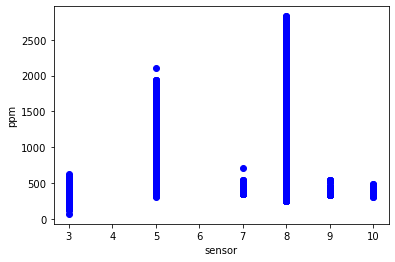

In [132]:
# ploting the correlation between features
plt.scatter(sensor_treino, ppm_treino, color='blue')
plt.xlabel('sensor')
plt.ylabel('ppm')
plt.show()

#### Creating the model with the train dataset

In [133]:
# creating a linear regression model
# LinearRegression is a method of sklearn
modelo = linear_model.LinearRegression()

In [134]:
# linear regression formula: (Y = A + B.X)
# training the model to obtain the values of A and B (always do it in the train dataset)
modelo.fit(sensor_treino, ppm_treino)

LinearRegression()

In [135]:
# exibiting the coeficients A and B that the model generated
print(f'(A) intercept: {modelo.intercept_} | (B) inclination: {modelo.coef_}')

(A) intercept: [457.98379378] | (B) inclination: [[-7.13147229]]


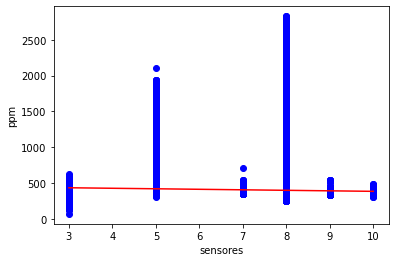

In [136]:
# print linear regression line on our TRAIN dataset
plt.scatter(sensor_treino, ppm_treino, color='blue')
plt.plot(sensor_treino, modelo.coef_[0][0]*sensor_treino + modelo.intercept_[0], '-r') 
# LR formula: inclination(B) * engine_treino(X) + intercept(A)
plt.ylabel('ppm')
plt.xlabel('sensores')
plt.show()

In [137]:
modelo.intercept_

array([457.98379378])

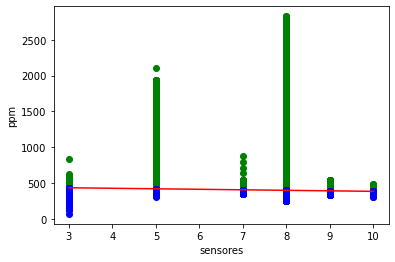

In [138]:
superior = df[df['ppm'] >  modelo.coef_[0][0]*df['sensor'] + modelo.intercept_[0]]
inferior = df[df['ppm'] < modelo.coef_[0][0]*df['sensor'] + modelo.intercept_[0]]

plt.scatter(superior['sensor'], superior['ppm'] , color='green')
plt.scatter(inferior['sensor'], inferior['ppm'] , color='blue')
plt.plot(sensor_treino, modelo.coef_[0][0]*sensor_treino + modelo.intercept_[0], '-r') 
# LR formula: inclination(B) * engine_treino(X) + intercept(A)
plt.ylabel('ppm')
plt.xlabel('sensores')
plt.show()

In [119]:
df['ppm'] > df['ppm'] + modelo.intercept_[0]

0         False
1         False
2         False
3         False
4         False
          ...  
641175    False
641176    False
641177    False
641178    False
641179    False
Name: ppm, Length: 641180, dtype: bool

#### Executing the model on the test dataset

In [120]:
predictCO2 = modelo.predict(sensor_test)

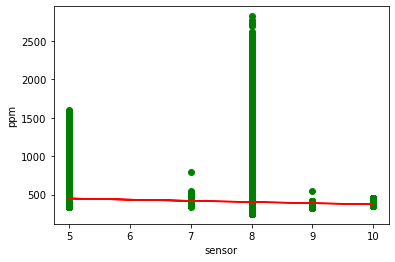

In [121]:
# print linear regression line on our TEST dataset
plt.scatter(sensor_test, ppm_test, color='green')
plt.plot(sensor_test, modelo.coef_[0][0]*sensor_test + modelo.intercept_[0], '-r')
plt.ylabel('ppm')
plt.xlabel('sensor')
plt.show()

#### Evaluating the model

In [138]:
# Showing metrics to check the acuracy of our model
print(f'Sum of squared error (SSE): {np.sum((predictCO2 - ppm_test)**2)}') # SSE: sum all of the  residuals and square them. 
print(f'Mean squared error (MSE): {mean_squared_error(ppm_test, predictCO2)}') # MSE: avg of SSE
print(f'Mean absolute error (MAE): {mean_absolute_error(ppm_test, predictCO2)}')
print (f'Sqrt of mean squared error (RMSE):  {np.sqrt(mean_squared_error(ppm_test, predictCO2))}') # RMSE: sqrt of the MSE
print(f'R2-score: {r2_score(predictCO2, ppm_test)}') # r2-score: explains the variance of the variable Y when it comes to X

Sum of squared error (SSE): ppm   11712932215.390
dtype: float64
Mean squared error (MSE): 20270.65577653844
Mean absolute error (MAE): 59.33094312463419
Sqrt of mean squared error (RMSE):  142.37505320995822
R2-score: -180.32001331192336
